# NYC Zipcode Geodata

### Installations

In [1]:
# !pip3 install --upgrade pip

In [2]:
# %pip install geopandas
# %pip install tabulate

### Imports

In [3]:
import sys

from tabulate import tabulate
import numpy as np
import pandas as pd

import geopandas

from shapely.geometry import box, Point

import folium

import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
%matplotlib inline

import contextily as cx

## Display Imports & Their Versions

In [4]:
headers = ["Software/Library", "Version"]

table_data = [
    ['Python', sys.version[0:6]],
    ['NumPy', np.__version__],
    ['Pandas', pd.__version__],
    ['geopandas', geopandas.__version__]
    ]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+--------------------+-----------+
| Software/Library   | Version   |
+====================+===========+
| Python             | 3.11.4    |
+--------------------+-----------+
| NumPy              | 1.26.4    |
+--------------------+-----------+
| Pandas             | 1.5.3     |
+--------------------+-----------+
| geopandas          | 1.0.1     |
+--------------------+-----------+


## Import Dataset

In [5]:
gdf = geopandas.read_file("data/data.geojson")

gdf

,OBJECTID,postalCode,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostalCode,Shape_Leng,Shape_Area,@id,geometry
0,1,11372,Jackson Heights,NY,Queens,36,081,0,20624.692317,2.016328e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.86942 40.74916, -73.89507 40.746..."
1,2,11004,Glen Oaks,NY,Queens,36,081,0,23002.816039,2.260653e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.71068 40.75004, -73.70869 40.748..."
2,3,11040,New Hyde Park,NY,Queens,36,081,0,15749.161511,6.269333e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.70098 40.7389, -73.70309 40.7445..."
3,4,11426,Bellerose,NY,Queens,36,081,0,35932.810639,4.941836e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.7227 40.75373, -73.72251 40.7533..."
4,5,11365,Fresh Meadows,NY,Queens,36,081,0,38693.565676,6.938587e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.81089 40.72717, -73.81116 40.728..."
...,...,...,...,...,...,...,...,...,...,...,...,...
257,258,10065,New York,NY,Manhattan,36,061,0,15541.743364,1.144258e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.95232 40.76454, -73.95442 40.762..."
258,259,10075,New York,NY,Manhattan,36,061,0,13540.765334,4.809655e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.94908 40.76828, -73.95052 40.768..."
259,260,10069,New York,NY,Manhattan,36,061,0,7780.632133,2.372366e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.98821 40.78123, -73.98675 40.780..."
260,261,10281,New York,NY,Manhattan,36,061,0,4717.025266,9.580872e+05,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-74.01468 40.7098, -74.01638 40.7100..."


In [6]:
gdf.describe(include='all')

,OBJECTID,postalCode,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostalCode,Shape_Leng,Shape_Area,@id,geometry
count,262.000000,262,262,262,262,262,262,262.000000,262.000000,2.620000e+02,262,262
unique,NaN,247,48,1,5,1,5,NaN,NaN,NaN,247,261
top,NaN,11693,New York,NY,Manhattan,36,061,NaN,NaN,NaN,http://nyc.pediacities.com/Resource/PostalCode...,POLYGON ((-73.98633231041309 40.73957922332434...
freq,NaN,4,110,262,112,262,112,NaN,NaN,NaN,4,2
mean,131.500000,NaN,NaN,NaN,NaN,NaN,NaN,0.217557,25078.357812,3.193743e+07,NaN,NaN
std,75.777085,NaN,NaN,NaN,NaN,NaN,NaN,0.413374,22018.840701,4.473356e+07,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,289.273986,3.154825e+03,NaN,NaN
25%,66.250000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,4839.030644,9.617625e+05,NaN,NaN
50%,131.500000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,24139.406908,2.226886e+07,NaN,NaN
75%,196.750000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,33751.668885,4.663378e+07,NaN,NaN


### Return Information About Unqiue Values in Select Features

In [7]:
cols_to_check = [
    "OBJECTID",
    "postalCode",
    "PO_NAME",
    "STATE",
    "borough",
    "ST_FIPS",
    "CTY_FIPS",
    "BLDGpostalCode",
    "Shape_Leng",
    "Shape_Area",
    "@id"
]

cutoff = int(len(gdf) / 2)

for col in cols_to_check:
    u_vals = np.sort(gdf[col].unique())
    if len(u_vals) < cutoff:
        print(f"{col} ({len(u_vals)})\n{u_vals}\n")
    else:
        print(f"{col} ({len(u_vals)})\n")

OBJECTID (262)

postalCode (247)

PO_NAME (48)
['Arverne' 'Astoria' 'Bayside' 'Bellerose' 'Breezy Point' 'Bronx'
 'Brooklyn' 'Cambria Heights' 'Central Park' 'College Point' 'Corona'
 'East Elmhurst' 'Elmhurst' 'Far Rockaway' 'Floral Park' 'Flushing'
 'Forest Hills' 'Fresh Meadows' 'Glen Oaks' 'Hollis' 'Howard Beach'
 'Inwood' 'Jackson Heights' 'Jamaica' 'Kew Gardens' 'Little Neck'
 'Long Island City' 'Maspeth' 'Middle Village' 'New Hyde Park' 'New York'
 'Oakland Gardens' 'Ozone Park' 'Queens Village' 'Rego Park'
 'Richmond Hill' 'Ridgewood' 'Rockaway Park' 'Rosedale' 'Saint Albans'
 'South Ozone Park' 'South Richmond Hill' 'Springfield Gardens'
 'Staten Island' 'Sunnyside' 'Whitestone' 'Woodhaven' 'Woodside']

STATE (1)
['NY']

borough (5)
['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']

ST_FIPS (1)
['36']

CTY_FIPS (5)
['005' '047' '061' '081' '085']

BLDGpostalCode (2)
[0 1]

Shape_Leng (261)

Shape_Area (261)

@id (247)



### Remove Select Features 

In [8]:
cols_to_remove = [
    "OBJECTID",
    "STATE",
    "ST_FIPS",
    "@id"
]

gdf.drop(columns=cols_to_remove, inplace=True)

gdf

,postalCode,PO_NAME,borough,CTY_FIPS,BLDGpostalCode,Shape_Leng,Shape_Area,geometry
0,11372,Jackson Heights,Queens,081,0,20624.692317,2.016328e+07,"POLYGON ((-73.86942 40.74916, -73.89507 40.746..."
1,11004,Glen Oaks,Queens,081,0,23002.816039,2.260653e+07,"POLYGON ((-73.71068 40.75004, -73.70869 40.748..."
2,11040,New Hyde Park,Queens,081,0,15749.161511,6.269333e+06,"POLYGON ((-73.70098 40.7389, -73.70309 40.7445..."
3,11426,Bellerose,Queens,081,0,35932.810639,4.941836e+07,"POLYGON ((-73.7227 40.75373, -73.72251 40.7533..."
4,11365,Fresh Meadows,Queens,081,0,38693.565676,6.938587e+07,"POLYGON ((-73.81089 40.72717, -73.81116 40.728..."
...,...,...,...,...,...,...,...,...
257,10065,New York,Manhattan,061,0,15541.743364,1.144258e+07,"POLYGON ((-73.95232 40.76454, -73.95442 40.762..."
258,10075,New York,Manhattan,061,0,13540.765334,4.809655e+06,"POLYGON ((-73.94908 40.76828, -73.95052 40.768..."
259,10069,New York,Manhattan,061,0,7780.632133,2.372366e+06,"POLYGON ((-73.98821 40.78123, -73.98675 40.780..."
260,10281,New York,Manhattan,061,0,4717.025266,9.580872e+05,"POLYGON ((-74.01468 40.7098, -74.01638 40.7100..."


### Rename Features as Needed

In [10]:
cols_to_rename = {
    "postalCode": "postal_code",
    "PO_NAME": "post_office_name",
    "CTY_FIPS": "city_fips",
    "BLDGpostalCode": "building_postal_code",
    "Shape_Leng": "shape_length",
    "Shape_Area": "shape_area"
}

gdf.rename(columns=cols_to_rename, inplace=True)

gdf.head()

,postal_code,post_office_name,borough,city_fips,building_postal_code,shape_length,shape_area,geometry
0,11372,Jackson Heights,Queens,081,0,20624.692317,2.016328e+07,"POLYGON ((-73.86942 40.74916, -73.89507 40.746..."
1,11004,Glen Oaks,Queens,081,0,23002.816039,2.260653e+07,"POLYGON ((-73.71068 40.75004, -73.70869 40.748..."
2,11040,New Hyde Park,Queens,081,0,15749.161511,6.269333e+06,"POLYGON ((-73.70098 40.7389, -73.70309 40.7445..."
3,11426,Bellerose,Queens,081,0,35932.810639,4.941836e+07,"POLYGON ((-73.7227 40.75373, -73.72251 40.7533..."
4,11365,Fresh Meadows,Queens,081,0,38693.565676,6.938587e+07,"POLYGON ((-73.81089 40.72717, -73.81116 40.728..."


## Data Visualizations

### Non-Interactive Data Visualization

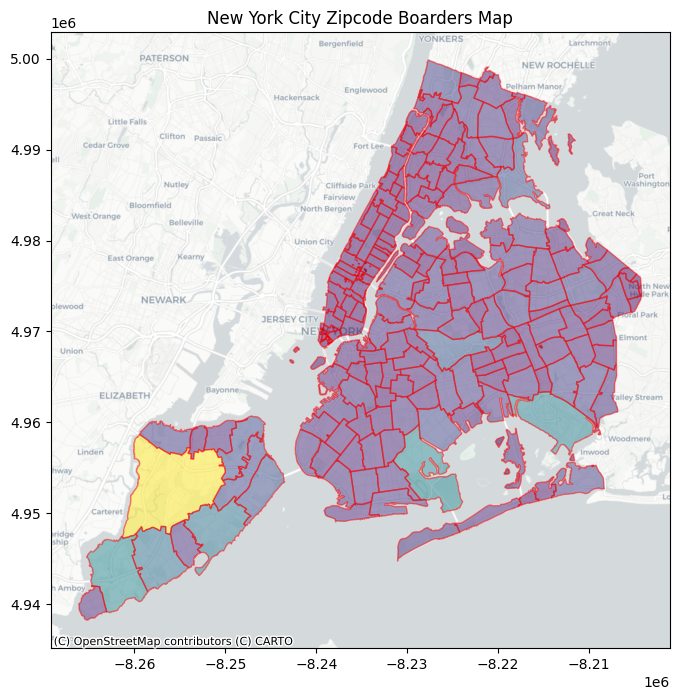

In [11]:
gdf_plot = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(24, 8))
gdf_plot.plot(column='shape_area', ax=ax, alpha=0.5, edgecolor="red")

# ax.set_xlim(-20000000, -7000000)
# ax.set_ylim(1500000, 13000000)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

ax.set_title("New York City Zipcode Boarders Map")

plt.show()

### Interactive Data Visualization

In [50]:
gdf.explore(
    m = folium.Map(
        location=[40.75, -73.9], 
        tiles='OpenStreetMap', # CartoDB Voyager, OpenStreetMap
        zoom_start=9,
        prefer_canvas=True
        ),
    popup=True,
    highlight=True,
    legend=True,
    control_scale=True,
    style_kwds = {
        'stroke': True,
        'color': '#3271a5',
        'weight': 1,
        'opacity': 0.75,
        'fill': True,
        'fillColor': '#b8e2f4',
        'fillOpacity': 0.35
    },
    highlight_kwds ={
        'stroke': True,
        'color': 'green',
        'weight': 2,
        'opacity': 1,
        'fill': True,
        'fillColor': '#88e788',
        'fillOpacity': 0.35
    },
    tooltip_kwds = {
        'labels': True,
        'aliases': [
            "Postal Code",
            "Post Office Name",
            "Borough",
            "City FIPS",
            "Building Postal Code",
            "Shape Length",
            "Shape Area"
        ]
    }
)

## Methods & Attributes

### Append Geometry Type Feature to GeoDataFrame

In [12]:
print("Geometry Type")

gdf_gt = gdf.copy()
gdf_gt['geometry_type'] = gdf.geom_type

gdf_gt

Geometry Type


,postal_code,post_office_name,borough,city_fips,building_postal_code,shape_length,shape_area,geometry,geometry_type
0,11372,Jackson Heights,Queens,081,0,20624.692317,2.016328e+07,"POLYGON ((-73.86942 40.74916, -73.89507 40.746...",Polygon
1,11004,Glen Oaks,Queens,081,0,23002.816039,2.260653e+07,"POLYGON ((-73.71068 40.75004, -73.70869 40.748...",Polygon
2,11040,New Hyde Park,Queens,081,0,15749.161511,6.269333e+06,"POLYGON ((-73.70098 40.7389, -73.70309 40.7445...",Polygon
3,11426,Bellerose,Queens,081,0,35932.810639,4.941836e+07,"POLYGON ((-73.7227 40.75373, -73.72251 40.7533...",Polygon
4,11365,Fresh Meadows,Queens,081,0,38693.565676,6.938587e+07,"POLYGON ((-73.81089 40.72717, -73.81116 40.728...",Polygon
...,...,...,...,...,...,...,...,...,...
257,10065,New York,Manhattan,061,0,15541.743364,1.144258e+07,"POLYGON ((-73.95232 40.76454, -73.95442 40.762...",Polygon
258,10075,New York,Manhattan,061,0,13540.765334,4.809655e+06,"POLYGON ((-73.94908 40.76828, -73.95052 40.768...",Polygon
259,10069,New York,Manhattan,061,0,7780.632133,2.372366e+06,"POLYGON ((-73.98821 40.78123, -73.98675 40.780...",Polygon
260,10281,New York,Manhattan,061,0,4717.025266,9.580872e+05,"POLYGON ((-74.01468 40.7098, -74.01638 40.7100...",Polygon


### Add Distance Features to Dataset

In [13]:
# Use the Harvard address coordinates as the reference point for distances

latitude = 42.3745
longitude = -71.1185

# Create a Shapely Point object
ref_point = Point(longitude, latitude)

if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)

# Estimate an appropriate UTM CRS for your GeoDataFrame
utm_crs = gdf.estimate_utm_crs()

# Reproject your GeoDataFrame to the estimated UTM CRS
gdf_projected = gdf.to_crs(utm_crs)

# Reproject the reference point to the same UTM CRS
ref_point_projected = geopandas.GeoSeries([ref_point], crs='EPSG:4326').to_crs(utm_crs).iloc[0]

In [14]:
# Calculate distances
gdf_projected['dist_from_harvard'] = gdf_projected['geometry'].distance(ref_point_projected)
gdf_projected['frechet_dist_from_harvard'] = gdf_projected['geometry'].frechet_distance(ref_point_projected)
gdf_projected['hausdorff_dist_from_harvard'] = gdf_projected['geometry'].hausdorff_distance(ref_point_projected)

gdf_projected

,postal_code,post_office_name,borough,city_fips,building_postal_code,shape_length,shape_area,geometry,dist_from_harvard,frechet_dist_from_harvard,hausdorff_dist_from_harvard
0,11372,Jackson Heights,Queens,081,0,20624.692317,2.016328e+07,"POLYGON ((595443.618 4511526.413, 593282.22 45...",291630.815882,293862.582333,293862.582333
1,11004,Glen Oaks,Queens,081,0,23002.816039,2.260653e+07,"POLYGON ((608843.458 4511809.249, 609013.535 4...",281224.933878,282848.712156,282848.712156
2,11040,New Hyde Park,Queens,081,0,15749.161511,6.269333e+06,"POLYGON ((609680.739 4510584.166, 609493.78 45...",280823.951038,281839.099364,281839.099364
3,11426,Bellerose,Queens,081,0,35932.810639,4.941836e+07,"POLYGON ((607822.681 4512204.4, 607840.023 451...",282133.382632,284820.540518,284820.540518
4,11365,Fresh Meadows,Queens,081,0,38693.565676,6.938587e+07,"POLYGON ((600418.6 4509151.212, 600394.092 450...",285963.777121,289738.672037,289738.672037
...,...,...,...,...,...,...,...,...,...,...,...
257,10065,New York,Manhattan,061,0,15541.743364,1.144258e+07,"POLYGON ((588424.646 4513147.201, 588250.598 4...",296396.994409,297718.690573,297718.690573
258,10075,New York,Manhattan,061,0,13540.765334,4.809655e+06,"POLYGON ((588693.237 4513566.137, 588571.361 4...",295538.921518,296460.521375,296460.521375
259,10069,New York,Manhattan,061,0,7780.632133,2.372366e+06,"POLYGON ((585374.43 4514963.83, 585498.86 4514...",297602.611948,298447.872515,298447.872515
260,10281,New York,Manhattan,061,0,4717.025266,9.580872e+05,"POLYGON ((583229.673 4507009.334, 583085.989 4...",303964.092111,304386.819074,304386.819074


### Retrieve Coordinates

In [15]:
gdf_get_coords = gdf.get_coordinates(include_z=True)
gdf_count_coords = gdf.count_coordinates()
gdf_count_geos = gdf.count_geometries()

print(f"GDF Coordinates:\n{gdf_get_coords}\n")
print(f"GDF Count Coordinates:\n{gdf_count_coords}\n")
print(f"GDF Count Geometries:\n{gdf_count_geos}")

GDF Coordinates:
             x          y   z
0   -73.869425  40.749157 NaN
0   -73.895071  40.746465 NaN
0   -73.896187  40.748509 NaN
0   -73.895840  40.748547 NaN
0   -73.895252  40.748307 NaN
..         ...        ...  ..
261 -74.016781  40.713998 NaN
261 -74.016334  40.713407 NaN
261 -74.017634  40.713607 NaN
261 -74.016706  40.718651 NaN
261 -74.013227  40.718323 NaN

[11175 rows x 3 columns]

GDF Count Coordinates:
0      12
1      25
2      13
3      45
4      31
       ..
257    13
258    16
259    15
260    10
261     8
Length: 262, dtype: int32

GDF Count Geometries:
0      1
1      1
2      1
3      1
4      1
      ..
257    1
258    1
259    1
260    1
261    1
Length: 262, dtype: int32


### Unary predicates

In [17]:
gdf_is_simple = gdf.is_simple
gdf_is_valid = gdf.is_valid
gdf_is_valid_reason = gdf.is_valid_reason()
gdf_has_z = gdf.has_z

gdf_is_simple_value_counts = gdf_is_simple.value_counts()
gdf_is_valid_value_counts = gdf_is_valid.value_counts()
gdf_is_valid_reason_value_counts = gdf_is_valid_reason.value_counts()
gdf_has_z_value_counts = gdf_has_z.value_counts()

print(f"is_simple:\n{gdf_is_simple_value_counts}\n")
print(f"is_valid:\n{gdf_is_valid_value_counts}\n")
print(f"is_valid_reason:\n{gdf_is_valid_reason_value_counts}\n")
print(f"has_z:\n{gdf_has_z_value_counts}")

is_simple:
True    262
dtype: int64

is_valid:
True    262
dtype: int64

is_valid_reason:
Valid Geometry    262
dtype: int64

has_z:
False    262
dtype: int64


### Check if Points Are Within Mapped Polygons

In [18]:
points_to_use = geopandas.GeoSeries([
    Point(-95.67804, 39.04833), # Topeka, Kansas, USA
    Point(-114.0719, 51.0447),  # Calgary, Alberta, Canada
    Point(80.0, -10.0),         # Midpoint in the Indian Ocean
    Point(-19.0208, 64.9631),   # Center of Iceland
    Point(31.1342, 29.9792),    # Pyramids of Giza, Egypt
    Point(86.9250, 27.9881),    # Mount Everest, Nepal
    Point(149.1300, -35.2809)   # Canberra, Australia (Capital City)
])

# Create a GeoDataFrame from points
points_to_use = geopandas.GeoDataFrame(geometry=points_to_use)

# Ensure both GeoDataFrames have the same CRS
points_to_use = points_to_use.set_crs(gdf.crs, allow_override=True)

# Perform spatial join to find points within polygons
points_within = geopandas.sjoin(points_to_use, gdf, predicate='within', how='inner')

print("points_within")
print(points_within)

points_within
Empty GeoDataFrame
Columns: [geometry, index_right, postal_code, post_office_name, borough, city_fips, building_postal_code, shape_length, shape_area]
Index: []


### Check if Points Are NOT Within Mapped Polygons

In [ ]:
points_not_within = points_to_use[~points_to_use.index.isin(points_within.index)]

print("points_not_within")
print(points_not_within)

points_not_within
                     geometry
0  POINT (-95.67804 39.04833)
1   POINT (-114.0719 51.0447)
2              POINT (80 -10)
3    POINT (-19.0208 64.9631)
4     POINT (31.1342 29.9792)
5      POINT (86.925 27.9881)
6     POINT (149.13 -35.2809)


### Some Basic Functions

In [19]:
gdf.boundary

0      LINESTRING (-73.86942 40.74916, -73.89507 40.7...
1      LINESTRING (-73.71068 40.75004, -73.70869 40.7...
2      LINESTRING (-73.70098 40.7389, -73.70309 40.74...
3      LINESTRING (-73.7227 40.75373, -73.72251 40.75...
4      LINESTRING (-73.81089 40.72717, -73.81116 40.7...
                             ...                        
257    LINESTRING (-73.95232 40.76454, -73.95442 40.7...
258    LINESTRING (-73.94908 40.76828, -73.95052 40.7...
259    LINESTRING (-73.98821 40.78123, -73.98675 40.7...
260    LINESTRING (-74.01468 40.7098, -74.01638 40.71...
261    LINESTRING (-74.01323 40.71832, -74.01421 40.7...
Length: 262, dtype: geometry

In [20]:
gdf_projected.buffer(distance=125)

0      POLYGON ((593074.465 4511748.495, 593025.219 4...
1      POLYGON ((608182.001 4512541.807, 608185.76 45...
2      POLYGON ((609416.643 4511307.157, 609305.958 4...
3      POLYGON ((606752.551 4510325.619, 606283.186 4...
4      POLYGON ((600438.901 4509027.871, 600426.945 4...
                             ...                        
257    POLYGON ((587649.215 4512519.523, 587648.785 4...
258    POLYGON ((588180.313 4514362.828, 588183.003 4...
259    POLYGON ((584904.198 4514332.751, 584904.663 4...
260    POLYGON ((582993.379 4507166.114, 582985.52 45...
261    POLYGON ((583199.526 4507357.085, 583197.599 4...
Length: 262, dtype: geometry

In [21]:
gdf_projected.centroid

0      POINT (594245.632 4511789.397)
1      POINT (608773.226 4511289.737)
2       POINT (609456.32 4511672.897)
3      POINT (607740.866 4510293.529)
4      POINT (601773.413 4510583.256)
                    ...              
257     POINT (587544.47 4513136.615)
258    POINT (588159.693 4514099.892)
259    POINT (585267.821 4514448.314)
260    POINT (583174.754 4507296.385)
261    POINT (583155.569 4507729.936)
Length: 262, dtype: geometry

In [22]:
gdf.convex_hull

0      POLYGON ((-73.89507 40.74647, -73.89619 40.748...
1      POLYGON ((-73.71371 40.73617, -73.71568 40.739...
2      POLYGON ((-73.70098 40.7389, -73.71068 40.7500...
3      POLYGON ((-73.72762 40.72225, -73.72991 40.723...
4      POLYGON ((-73.81089 40.72717, -73.81497 40.738...
                             ...                        
257    POLYGON ((-73.95906 40.75797, -73.97255 40.764...
258    POLYGON ((-73.94908 40.76828, -73.95052 40.768...
259    POLYGON ((-73.98964 40.77296, -73.99307 40.774...
260    POLYGON ((-74.01468 40.7098, -74.01638 40.7100...
261    POLYGON ((-74.01633 40.71341, -74.01763 40.713...
Length: 262, dtype: geometry

In [23]:
gdf.envelope

0      POLYGON ((-73.89654 40.74647, -73.86942 40.746...
1      POLYGON ((-73.7227 40.73617, -73.70098 40.7361...
2      POLYGON ((-73.71068 40.7389, -73.6996 40.7389,...
3      POLYGON ((-73.74169 40.72225, -73.70906 40.722...
4      POLYGON ((-73.8151 40.72717, -73.77286 40.7271...
                             ...                        
257    POLYGON ((-73.97255 40.75797, -73.95232 40.757...
258    POLYGON ((-73.96469 40.76828, -73.94653 40.768...
259    POLYGON ((-73.99307 40.77296, -73.98675 40.772...
260    POLYGON ((-74.01678 40.7098, -74.01375 40.7098...
261    POLYGON ((-74.01763 40.71341, -74.01323 40.713...
Length: 262, dtype: geometry

In [24]:
gdf.extract_unique_points()

0      MULTIPOINT (-73.86942 40.74916, -73.89507 40.7...
1      MULTIPOINT (-73.71068 40.75004, -73.70869 40.7...
2      MULTIPOINT (-73.70098 40.7389, -73.70309 40.74...
3      MULTIPOINT (-73.7227 40.75373, -73.72251 40.75...
4      MULTIPOINT (-73.81089 40.72717, -73.81116 40.7...
                             ...                        
257    MULTIPOINT (-73.95232 40.76454, -73.95442 40.7...
258    MULTIPOINT (-73.94908 40.76828, -73.95052 40.7...
259    MULTIPOINT (-73.98821 40.78123, -73.98675 40.7...
260    MULTIPOINT (-74.01468 40.7098, -74.01638 40.71...
261    MULTIPOINT (-74.01323 40.71832, -74.01421 40.7...
Length: 262, dtype: geometry

In [25]:
gdf.force_2d()

0      POLYGON ((-73.86942 40.74916, -73.89507 40.746...
1      POLYGON ((-73.71068 40.75004, -73.70869 40.748...
2      POLYGON ((-73.70098 40.7389, -73.70309 40.7445...
3      POLYGON ((-73.7227 40.75373, -73.72251 40.7533...
4      POLYGON ((-73.81089 40.72717, -73.81116 40.728...
                             ...                        
257    POLYGON ((-73.95232 40.76454, -73.95442 40.762...
258    POLYGON ((-73.94908 40.76828, -73.95052 40.768...
259    POLYGON ((-73.98821 40.78123, -73.98675 40.780...
260    POLYGON ((-74.01468 40.7098, -74.01638 40.7100...
261    POLYGON ((-74.01323 40.71832, -74.01421 40.713...
Length: 262, dtype: geometry

In [26]:
gdf.minimum_bounding_circle()

0      POLYGON ((-73.86917 40.75177, -73.86944 40.749...
1      POLYGON ((-73.69775 40.74759, -73.698 40.745, ...
2      POLYGON ((-73.69448 40.74708, -73.69464 40.745...
3      POLYGON ((-73.70607 40.73651, -73.70641 40.733...
4      POLYGON ((-73.77256 40.73987, -73.77296 40.735...
                             ...                        
257    POLYGON ((-73.95232 40.76472, -73.95252 40.762...
258    POLYGON ((-73.94629 40.77357, -73.94647 40.771...
259    POLYGON ((-73.9854 40.7774, -73.98548 40.77653...
260    POLYGON ((-74.01284 40.71228, -74.01289 40.711...
261    POLYGON ((-74.0122 40.71596, -74.01227 40.7153...
Length: 262, dtype: geometry

In [27]:
gdf.minimum_clearance()

0      0.000323
1      0.000131
2      0.000913
3      0.000208
4      0.000142
         ...   
257    0.000119
258    0.000159
259    0.000374
260    0.000632
261    0.000516
Length: 262, dtype: float64

In [28]:
gdf.minimum_rotated_rectangle()

0      POLYGON ((-73.87026 40.75715, -73.89694 40.754...
1      POLYGON ((-73.69906 40.73985, -73.71 40.76181,...
2      POLYGON ((-73.69381 40.74464, -73.7038 40.7561...
3      POLYGON ((-73.74499 40.74356, -73.73136 40.715...
4      POLYGON ((-73.778 40.75734, -73.81722 40.74777...
                             ...                        
257    POLYGON ((-73.95232 40.76454, -73.96848 40.772...
258    POLYGON ((-73.96498 40.77498, -73.94806 40.767...
259    POLYGON ((-73.98812 40.78156, -73.99319 40.774...
260    POLYGON ((-74.01658 40.71486, -74.01764 40.710...
261    POLYGON ((-74.01421 40.71298, -74.01323 40.718...
Length: 262, dtype: geometry

In [29]:
gdf.normalize()

0      POLYGON ((-73.89654 40.75054, -73.8958 40.7506...
1      POLYGON ((-73.7227 40.75373, -73.72184 40.7548...
2      POLYGON ((-73.71068 40.75004, -73.7075 40.7526...
3      POLYGON ((-73.74169 40.73682, -73.73916 40.739...
4      POLYGON ((-73.8151 40.73923, -73.81321 40.7389...
                             ...                        
257    POLYGON ((-73.97255 40.7649, -73.96845 40.7705...
258    POLYGON ((-73.96469 40.77568, -73.96323 40.777...
259    POLYGON ((-73.99307 40.77434, -73.99263 40.774...
260    POLYGON ((-74.01678 40.714, -74.0162 40.71477,...
261    POLYGON ((-74.01763 40.71361, -74.01671 40.718...
Length: 262, dtype: geometry

In [31]:
gdf.active_geometry_name

'geometry'

### Display Translated (Shifted) Polygons

In [30]:
translated_gdf = gdf.translate(xoff=-0.05, yoff=0.05)

translated_gdf.explore()

### Iterate Through All Rows

In [32]:
for index, row in gdf.iterrows():
    print("All Data:", row)

All Data: postal_code                                                         11372
post_office_name                                          Jackson Heights
borough                                                            Queens
city_fips                                                             081
building_postal_code                                                    0
shape_length                                                 20624.692317
shape_area                                                  20163283.8744
geometry                POLYGON ((-73.86942457284175 40.74915687096787...
Name: 0, dtype: object
All Data: postal_code                                                         11004
post_office_name                                                Glen Oaks
borough                                                            Queens
city_fips                                                             081
building_postal_code                                                 

### Iterate Through All Features

In [33]:
for feature in gdf.iterfeatures():
    print(feature)

{'id': '0', 'type': 'Feature', 'properties': {'postal_code': '11372', 'post_office_name': 'Jackson Heights', 'borough': 'Queens', 'city_fips': '081', 'building_postal_code': 0, 'shape_length': 20624.6923165, 'shape_area': 20163283.8744}, 'geometry': {'type': 'Polygon', 'coordinates': (((-73.86942457284175, 40.74915687096787), (-73.89507143240856, 40.74646547081214), (-73.89618737867819, 40.74850942518086), (-73.89583954185139, 40.748546875706005), (-73.89525242774396, 40.74830660945023), (-73.89654041085561, 40.750541998143575), (-73.89579868613828, 40.750619721332605), (-73.89652230661433, 40.75438879610902), (-73.87221855882477, 40.756943248067465), (-73.87167992356791, 40.75398717439602), (-73.87207046513889, 40.75386200705204), (-73.86942457284175, 40.74915687096787)),)}}
{'id': '1', 'type': 'Feature', 'properties': {'postal_code': '11004', 'post_office_name': 'Glen Oaks', 'borough': 'Queens', 'city_fips': '081', 'building_postal_code': 0, 'shape_length': 23002.8160385, 'shape_area

### Interface

In [34]:
gdf.__geo_interface__

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {'postal_code': '11372',
    'post_office_name': 'Jackson Heights',
    'borough': 'Queens',
    'city_fips': '081',
    'building_postal_code': 0,
    'shape_length': 20624.6923165,
    'shape_area': 20163283.8744},
   'geometry': {'type': 'Polygon',
    'coordinates': (((-73.86942457284175, 40.74915687096787),
      (-73.89507143240856, 40.74646547081214),
      (-73.89618737867819, 40.74850942518086),
      (-73.89583954185139, 40.748546875706005),
      (-73.89525242774396, 40.74830660945023),
      (-73.89654041085561, 40.750541998143575),
      (-73.89579868613828, 40.750619721332605),
      (-73.89652230661433, 40.75438879610902),
      (-73.87221855882477, 40.756943248067465),
      (-73.87167992356791, 40.75398717439602),
      (-73.87207046513889, 40.75386200705204),
      (-73.86942457284175, 40.74915687096787)),)},
   'bbox': (-73.89654041085561,
    40.74646547081214,
    -73.869

## Save Cleaned Dataset to File

In [36]:
new_file_name_and_path = 'data/cleaned_gdf_file.geojson'

gdf.to_file(new_file_name_and_path, driver="geojson")

### Resources Used (links to libraries used in this project)

- GeoPandas: https://geopandas.org/en/stable/